#MINI TA
##Overview
Sample Technical Analyst is a simple project for predicting prices of set stock prices. This is originally for me to practice financial ML and stock analysis.
\
(Plans for a larger project will ensue.)

###Companies
The stocks I will watch are:
- Nvidia
- Amazon
- Duke Energies
- /tbd/ mystery stock

For baseline comparisons, I will also run the S&P500 thrgouh the prediction to compare whether select investments will yield higher returns that a lump investment in a S&P fund.

###Dependencies
Libraries used in theis project:

- Pandas
- Numpy
- yFinance
- Seaborn
- Matplot (pyplot)




In [149]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix
from datetime import date, timedelta

In [150]:
# timeframe
# TODO: config file !!!!
start_time = "2022-01-01"
today = date.today() - timedelta(days=1)
end_time = today.strftime("%Y-%m-%d")

# stocks
# NVida
nvda = pd.DataFrame(yf.download("NVDA", start=start_time, end=end_time))
# Amazon
amzn = pd.DataFrame(yf.download("AMZN", start=start_time, end=end_time))
# Duke
duk =  pd.DataFrame(yf.download("DUK", start=start_time, end=end_time))
# Tesla
tsla =  pd.DataFrame(yf.download("TSLA", start=start_time, end=end_time))

# S&P500
sp500 =  pd.DataFrame(yf.download("^GSPC", start=start_time, end=end_time))

# display S&P
sp500.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2022-01-03,4796.560059,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
2022-01-04,4793.540039,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2022-01-05,4700.580078,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
2022-01-06,4696.049805,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
2022-01-07,4677.029785,4677.029785,4707.950195,4662.740234,4697.660156,4181510000


In [151]:
# Data Exploration

def df_info(dataFrame) :
  stock_info = pd.DataFrame({
      'Datatype': dataFrame.dtypes,
      'Null_count': dataFrame.isnull().sum(),
      'Null_percent': dataFrame.isnull().sum()/len(dataFrame) * 100
    })
  dataFrame.columns = dataFrame.columns.get_level_values(0)
  dataFrame.convert_dtypes()

  # return stock_info

df_info(nvda)
df_info(amzn)
df_info(duk)
df_info(tsla)
df_info(sp500)

tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-01-03,399.926666,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,342.320007,360.309998,336.666656,360.123322,84164700


### Output
| Price     | Type    | Nulls |%|
| --------- | ------- | - | --- |
| Adj Close |	float64 |	0	| 0.0 |
| Close	    |	float64 |	0	| 0.0 |
| High	    |	float64 |	0	| 0.0 |
| Low	      |	float64 |	0	| 0.0 |
| Open	    |	float64	|	0	| 0.0 |
| Volume	  |	float64	|	0	| 0.0 |

In [152]:
print("NVidia\n", nvda.describe())
print()
print("Amazon\n",amzn.describe())
print()
print("Duke\n",duk.describe())
print()
print("Tesla \n",tsla.describe())

NVidia
 Price   Adj Close       Close        High         Low        Open  \
count  751.000000  751.000000  751.000000  751.000000  751.000000   
mean    54.179665   54.198880   55.212184   53.095346   54.207630   
std     42.023236   42.020497   42.784002   41.219163   42.103966   
min     11.215971   11.227000   11.735000   10.813000   10.971000   
25%     19.542802   19.564500   19.991000   18.885000   19.432000   
50%     41.856998   41.875999   42.470001   40.945000   41.591000   
75%     87.610775   87.631500   89.055500   85.996502   87.518501   
max    148.869751  148.880005  152.889999  146.259995  149.350006   

Price        Volume  
count  7.510000e+02  
mean   4.653696e+08  
std    1.663748e+08  
min    1.051570e+08  
25%    3.634805e+08  
50%    4.511530e+08  
75%    5.508740e+08  
max    1.543911e+09  

Amazon
 Price   Adj Close       Close        High         Low        Open  \
count  751.000000  751.000000  751.000000  751.000000  751.000000   
mean   143.914439  143.91

In [153]:
# Market Cap (lower risk-higher return analysis)
nvda['M_Cap'] = nvda['Adj Close'] * nvda['Volume']


amzn['M_Cap'] = amzn['Adj Close'] * amzn['Volume']
duk['M_Cap'] = duk['Adj Close'] * duk['Volume']
tsla['M_Cap'] = tsla['Adj Close'] * tsla['Volume']

sp500['M_Cap'] = sp500['Adj Close'] * sp500['Volume']
nvda.head()

Price,Adj Close,Close,High,Low,Open,Volume,M_Cap
Date,,,,,,,
2022-01-03,30.070992,30.121000,30.711000,29.785000,29.815001,391547000,1.177421e+10
2022-01-04,29.241369,29.290001,30.468000,28.349001,30.277000,527154000,1.541470e+10
2022-01-05,27.558167,27.604000,29.416000,27.533001,28.948999,498064000,1.372573e+10
2022-01-06,28.131214,28.177999,28.438000,27.065001,27.639999,454186000,1.277680e+10
2022-01-07,27.201759,27.247000,28.422001,27.056999,28.141001,409939000,1.115106e+10


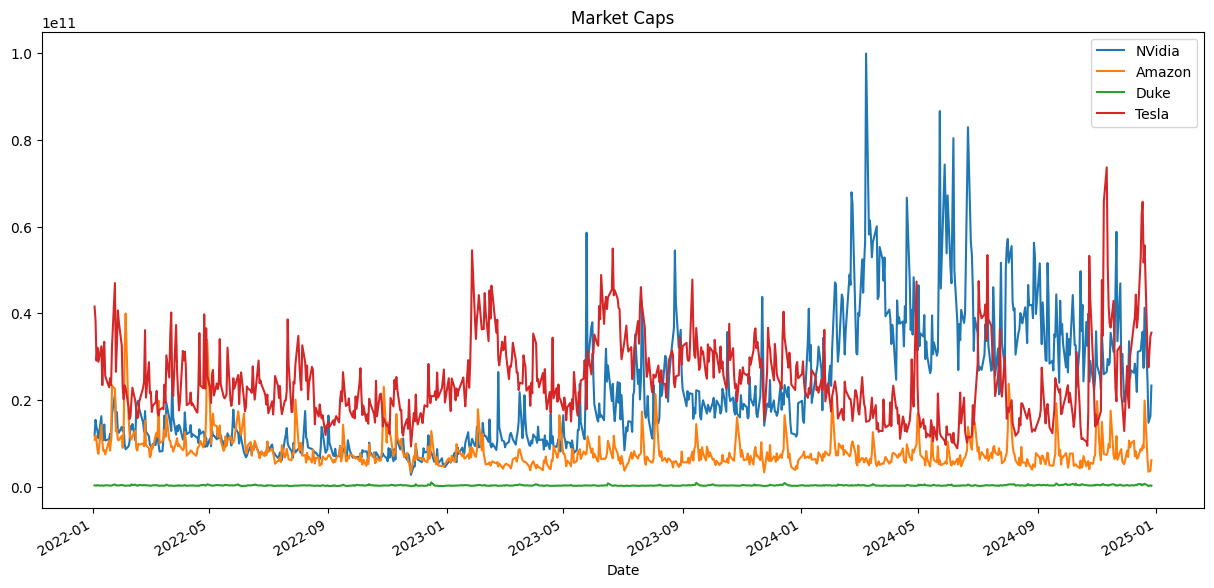

In [154]:
nvda['M_Cap'].plot(label = "NVidia", figsize = (15, 7))
# print(nvda['M_Cap'])
amzn['M_Cap'].plot(label = "Amazon")
duk['M_Cap'].plot(label = "Duke")
tsla['M_Cap'].plot(label = "Tesla")
plt.title('Market Caps')
plt.legend()

Note that Duke market cap is smaller comparitively to the others.
With independant testing, I have made more profit off investing in Duke Energy based on following politician investments. But Nvidia, Amazon, and Tesla are 'safer'

In [171]:
# Moving Average
nvda['MA_50'] = nvda['Open'].rolling(50).mean()
nvda['MA_200'] = nvda['Open'].rolling(200).mean()

amzn['MA_50'] = amzn['Open'].rolling(50).mean()
amzn['MA_200'] = amzn['Open'].rolling(200).mean()

tsla['MA_50'] = tsla['Open'].rolling(50).mean()
tsla['MA_200'] = tsla['Open'].rolling(200).mean()

duk['MA_50'] = duk['Open'].rolling(50).mean()
duk['MA_200'] = duk['Open'].rolling(200).mean()

sp500['MA_50'] = sp500['Open'].rolling(50).mean()
sp500['MA_200'] = sp500['Open'].rolling(200).mean()

In [169]:
tsla.isna().sum()


,0
Price,
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
M_Cap,49
MA_200,199
M_50,49


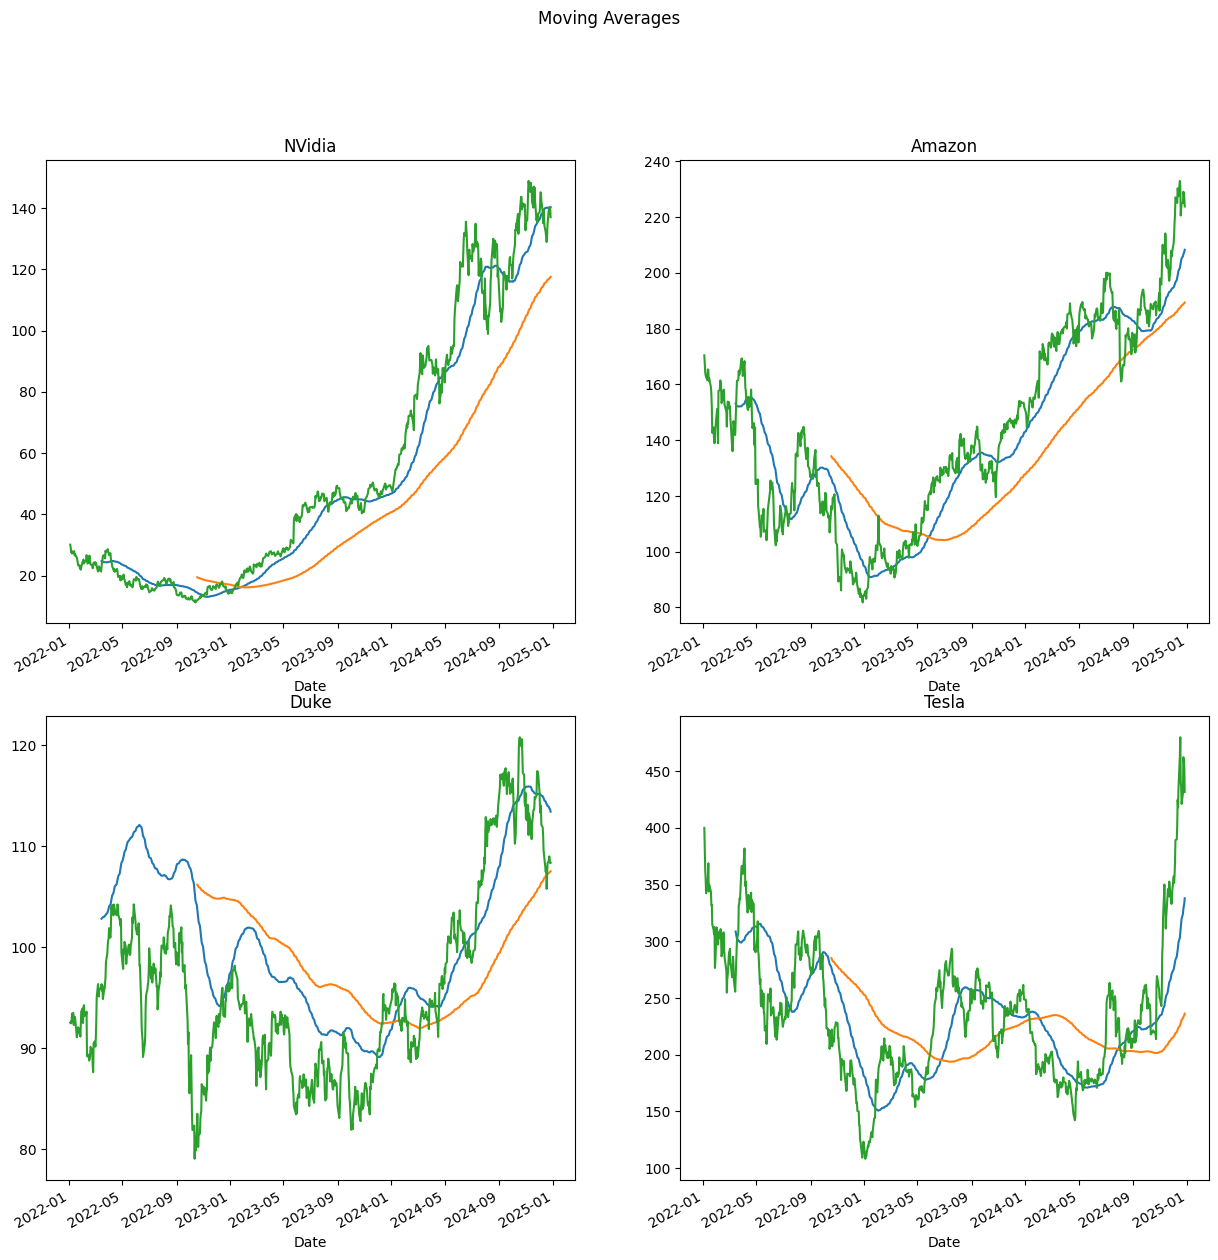

In [176]:
# plot moving avg
figure, axes = plt.subplots(2, 2, figsize = (15,15))
figure.suptitle('Moving Averages')

axes[0,0].set_title('NVidia')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Duke')
axes[1,1].set_title('Tesla')

nvda['MA_50'].plot(ax = axes[0,0])
nvda['MA_200'].plot(ax = axes[0,0])
nvda['Adj Close'].plot(ax = axes[0,0])

amzn['MA_50'].plot(ax = axes[0,1])
amzn['MA_200'].plot(ax = axes[0,1])
amzn['Adj Close'].plot(ax = axes[0,1])


tsla['MA_50'].plot(ax = axes[1,1])
tsla['MA_200'].plot(ax = axes[1,1])
tsla['Adj Close'].plot(ax = axes[1,1])

duk['MA_50'].plot(ax = axes[1,0])
duk['MA_200'].plot(ax = axes[1,0])
duk['Adj Close'].plot(ax = axes[1,0])

plt.show()